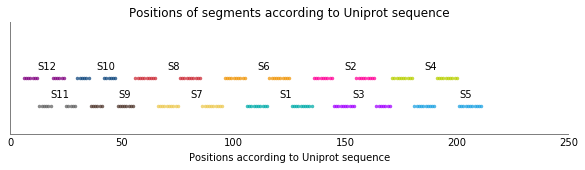

1891 unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions


/Users/karen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [114]:
%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks03'
image_counter = Counter()

## Fitness overview

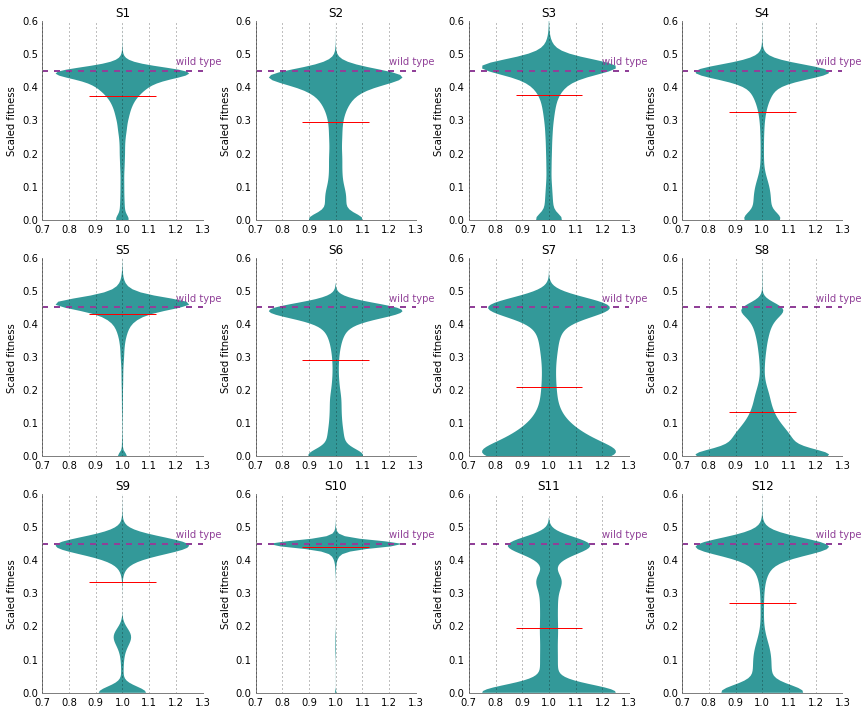

In [55]:
plot_better(width=12, height=10)
title = 'Distribution of mutants with different number of mutations'
facecolor = '#008080'
edgecolor = 'none'
wt_color = '#904098'
for index, item in enumerate(data.items()):
    segment_name, segment = item
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name.split('_')[0])
    mutant_distribution = np.array([len(segment[segment.mut_list.str.count(':') == mut_number-1]) for mut_number in range(1,13)])
    width = 1

    vplot = plt.violinplot(segment.s.values, showmeans=True, showmedians=False, showextrema=False)
    for patch in vplot['bodies']:
        patch.set_facecolor(facecolor)
        patch.set_alpha(0.8)
        patch.set_edgecolor(edgecolor)
    plt.axhline(0.45, ls='--', color=wt_color, lw=2)
    plt.text(1.2, 0.47, 'wild type', color=wt_color, fontsize=10)
    improve_plot(ax, grid='x')
    plt.ylabel('Scaled fitness')
    plt.ylim(0,0.6)
# plt.suptitle(title, fontsize=18)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

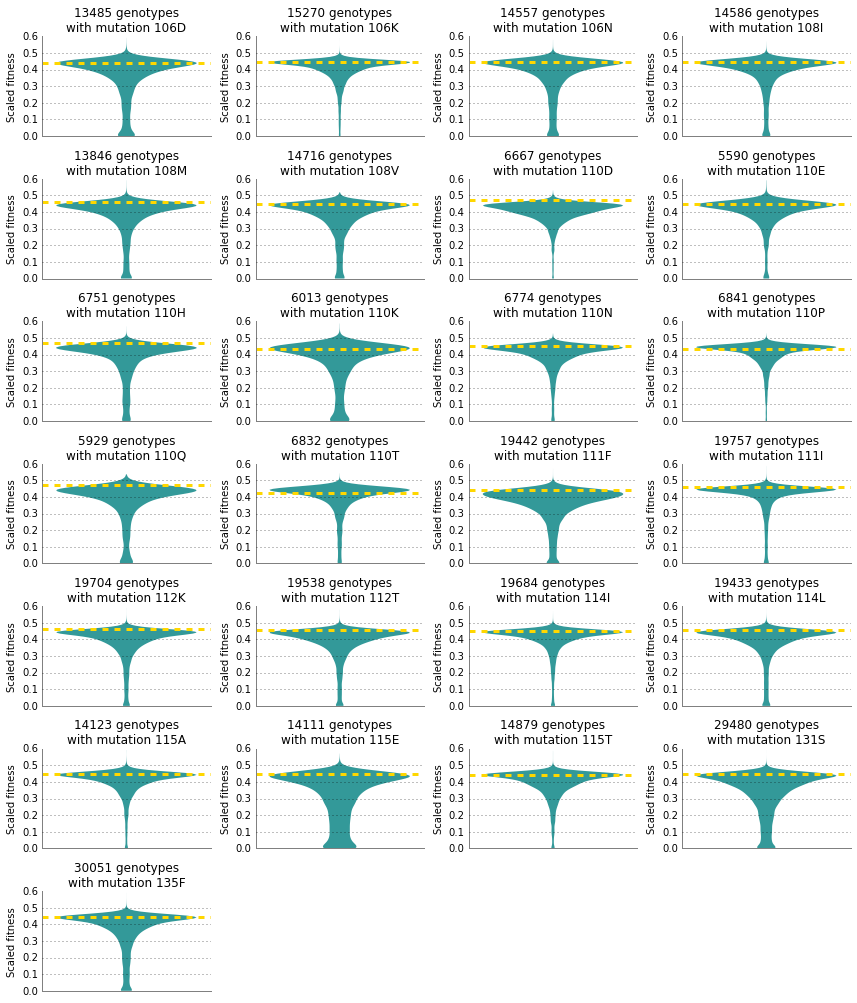

In [61]:
for segment_name, segment_data in data_known_mutations_only.items():
    single_mutations = sorted(list(set(':'.join(segment_data.mut_list_Scer.values).split(':'))))
    total_subplots = len(single_mutations)
    number_of_rows = total_subplots/4+1
    plot_better(width=12, height=2*number_of_rows)
    for index, mutation in enumerate(single_mutations):
        genotypes_with_current_mutation = segment_data[segment_data.mut_list_Scer.str.contains(mutation)] #buggy!
#         singles_summary[mutation] = {'fitness': single_mut_fitness_dict[mutation]}#, genotypes_with_current_mutation.epistasis.median(), segment_name))
        ax = plt.subplot(number_of_rows,4,index+1)
        plt.title('%s genotypes\nwith mutation %s' %(len(genotypes_with_current_mutation), mutation))
        vplot = plt.violinplot(genotypes_with_current_mutation.s.values, showmeans=False, showmedians=False, showextrema=False)
        for patch in vplot['bodies']:
            patch.set_facecolor(facecolor)
            patch.set_alpha(0.8)
            patch.set_edgecolor(edgecolor)
        plt.axhline(single_mut_fitness_dict[mutation], ls='--', color='#ffd700', lw=3)
        improve_plot(ax, grid='y')
        plt.ylabel('Scaled fitness')
        plt.ylim(0, 0.6)
        plt.xticks([])
    plt.tight_layout()
    break
    save_image(image_counter, title, figures_folder, notebook_prefix)
    plt.close()

### Distribution of fitness for genotypes containing particular single mutations

In [73]:
singles_summary = OrderedDict()
max_mut_number = 7
bar_color = '#8b848e'
single_fitness_color = '#e92c74'
for segment_name, segment_data in data.items():
    title = 'Segment %s - fitness of mutants containing single mutations' %segment_name.split('_')[0]
    single_mutations = data_singles[segment_name].mut_list_Scer.values
    plot_better(width=4 * max_mut_number, height=3 * len(single_mutations))
    for y_index, mutation in enumerate(single_mutations):
        for x_index, mut_number in enumerate(range(2, max_mut_number+1)):
            current_subset = segment_data[(segment_data.mut_number == mut_number) & 
                                          (segment_data.mut_list_Scer.str.contains(mutation))]
            singles_summary[mutation] = {'single_fitness':single_mut_fitness_dict[mutation], 'median':current_subset['s'].median(), 'mean':current_subset['s'].mean(),
                                        'std':current_subset['s'].std(), 'min':current_subset['s'].min(),
                                        'max':current_subset['s'].max(), 'segment':segment_name.split('_')[0], 
                                        'segment_color':segment_colors[segment_name.split('_')[0]]}
            ax = plt.subplot2grid((len(single_mutations), max_mut_number), (y_index, x_index))
            plt.title('\n%s genotypes with %s mutations\nwith mutation %s' %(len(current_subset), mut_number, mutation))
            plt.hist(current_subset['s'].values, edgecolor='none', range=(0,0.6), bins=60, color=bar_color)
            plt.axvline(single_mut_fitness_dict[mutation], lw=3, ls='-', color=single_fitness_color, alpha=0.5)
            plt.xlim(0,0.6)
            plt.xlabel('Scaled fitness')
            plt.ylabel(mutation)
            improve_plot(ax, grid='x')
    plt.tight_layout()
    save_image(image_counter, title, figures_folder, notebook_prefix)
    plt.close()
singles_summary = pd.DataFrame.from_dict(singles_summary, orient='index')

### Fitness of single mutant vs. fitness of genotypes containing this single mutation

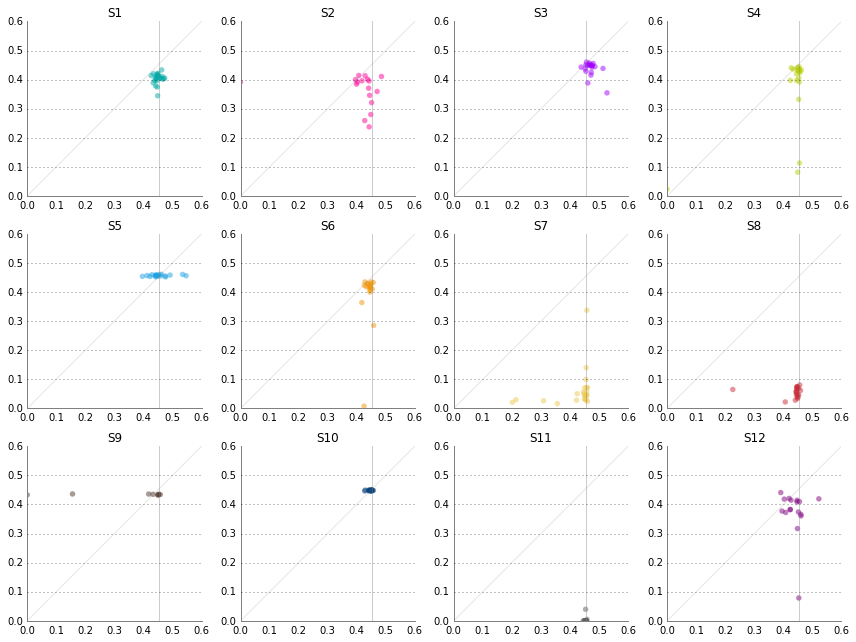

In [125]:
plot_better(height=9, width=12)
for index, segment_name in enumerate(segment_colors):
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name)
    subset = singles_summary[singles_summary.segment == segment_name]
    plt.scatter(subset.single_fitness, subset['median'], s=30, c=subset.segment_color, edgecolor='none', alpha=0.5)
    plt.plot([0,0.6], [0,0.6], color='gray', alpha=0.2)
    plt.axvline(wt_fitness, color='gray', alpha=0.4)
    plt.xlim(0,0.6)
    plt.ylim(0,0.6)
    improve_plot(ax, grid='y')
plt.tight_layout()